In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
print(cv2.__version__)

3.1.0


In [2]:
# Converts video to frames
# video_path: Location of the input video file
# target_path: Location of the output frames
# skip: how many frames are going to be skipped
def videoToFrames(video_path, target_path, skip = 3):
    vidcap = cv2.VideoCapture(video_path)  # TODO check if video file
    success,image = vidcap.read()
    count = 0
    success = True
    while success:
        success,image = vidcap.read()
        if count % (skip + 1) == 0:  # In default: Skip 3 frames, save only every 4th frame
            #print 'Read a new frame: ', success
            cv2.imwrite("%s/frame%d.jpg" % (target_path, count), image)  # save frame as JPEG file
        count += 1
    
    vidcap.release()
    

In [5]:
# TODO at the moment assumes that second level has only folders and third level only videos - make it fancier if needed
# -> may cause issues with reading in video files
# TODO add option to delete old frames from target directory
# TODO try catch for os errors

import os

# Convert all videos from input folder to frames and put into target folder
# input_folder (str): Folder that is checked for videos
# target_folder (str): Folder where video frames are added
def videosToFrames(input_folder = "Videos", target_folder = "Frames", skip = 3):
    
    try:
    
        dirs = os.listdir(input_folder)

        # Go through all subdirectories
        for dir_name in dirs:  # d - keyword inserted into youtube (to group videos)
            d_path = "%s/%s" % (input_folder, dir_name)
            videos = os.listdir(d_path)

            # Go through all the videos
            for v_name in videos:  # get all video names
                video_path = "%s/%s" % (d_path, v_name)
                v_name_new = ".".join(v_name.split(".")[:-1])  # Remove file extension from the video name
                v_name_new = v_name_new.replace("?","")  # Remove question marks from folder path.
                target_path = "%s/%s/%s" % (target_folder, dir_name, v_name_new)

                if not os.path.exists(target_path):  # Create directory to target folder if needed
                    os.makedirs(target_path)
                    
                # Convert video to frames
                videoToFrames(video_path = video_path, target_path = target_path, skip = skip)
                
            print("Videos are processed for directory: " + dir_name )
        
    except os.error as e:
        print(e)
    

In [1]:
# Default input folder "Videos" and target "Frames"
# Also videos should be in separate subdirectories 
videosToFrames()


NameError: name 'videosToFrames' is not defined

**Face detection**

In [47]:
def regocnizeFaceByImg(image):
    #Using default opencv provided cascade    
    faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(
    gray, #Using grayscale image
    scaleFactor=1.1, #Since some faces may be closer to the camera, they would appear bigger than those faces in the back. The scale factor compensates for this.
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
    )
    
    return faces
    

def regocnizeFaceByPath(imgPath):
    image = cv2.imread(imgPath)
    faces = regocnizeFaceByImg(image)
    
    return faces, image


In [38]:
def cropFacesFromImage(image, faces):
    faceImages = []
    for (x, y, w, h) in faces:
        croppedImg = image[y: y + h, x: x + w] # Crop from x, y, w, h -> 100, 200, 300, 400
        faceImages.append(croppedImg)

    return faceImages

Found 1 faces!


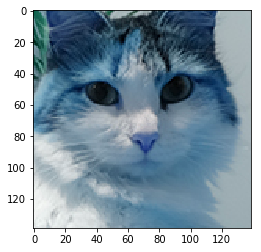

In [50]:
faces, image = regocnizeFaceByPath("test.jpg")

print "Found {0} faces!".format(len(faces))

faceImages = cropFacesFromImage(image, faces)

for face in faceImages:
    plt.imshow(face)
    plt.show()
